In [1]:
sys.path.append("..")
import utils
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_paths(dir_path = "../results/"):
    paths = os.listdir(dir_path)
    rel_paths = []
    for i in range(len(paths)):
        if not (paths[i] == '.DS_Store' or paths[i] == 'archive'):
            rel_paths.append("results/" + paths[i])

            print(paths[i].split("_")[2] + " " + paths[i].split("_")[3])
    return rel_paths

## Plot vaccinated distribution for all results

infection based
fhi policy
susceptible based
infection based
oldest first
contact based
Reading results ..
100%|██████████| 500/500 [00:10<00:00, 48.30it/s]


<Figure size 432x288 with 0 Axes>

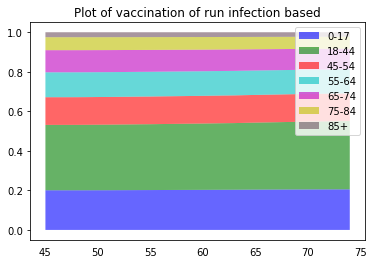

Reading results ..


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [3]:
paths = read_all_results()
for relative_path in paths:
    age_labels, vaccines_available, flow_scale,contact_weights,S_regions,I_regions,new_infected_regions,new_deaths_regions,vaccinated_regions,S_age_groups,         I_age_groups,new_infected_age_groups,new_deaths_age_groups,vaccinated_age_groups = utils.read_csv(relative_path=relative_path)
    vaccinated_mean = vaccinated_age_groups.mean(axis=0)
    norm = np.where(np.int64(vaccinated_mean.sum(axis=1, keepdims=True))==0, 1, vaccinated_mean.sum(axis=1, keepdims=True))
    vaccinated = np.divide(vaccinated_mean, norm)
    vaccinated_cumsum = vaccinated.cumsum(axis=1)
    week_cut = np.where(vaccinated_mean > 0)[0][0]

    plt.figure()
    fig, ax = plt.subplots(1)
    weeks = np.arange(vaccinated_mean.shape[0])
    ax.fill_between(weeks[week_cut:], 0, vaccinated_cumsum[week_cut:,0], label = age_labels[0], facecolor="b", alpha=.6)
    ax.fill_between(weeks[week_cut:], vaccinated_cumsum[week_cut:,0], vaccinated_cumsum[week_cut:,1], label = age_labels[1], facecolor="g", alpha=.6)
    ax.fill_between(weeks[week_cut:], vaccinated_cumsum[week_cut:,1], vaccinated_cumsum[week_cut:,2], label = age_labels[2], facecolor="r", alpha=.6)
    ax.fill_between(weeks[week_cut:], vaccinated_cumsum[week_cut:,2], vaccinated_cumsum[week_cut:,3], label = age_labels[3], facecolor="c", alpha=.6)
    ax.fill_between(weeks[week_cut:], vaccinated_cumsum[week_cut:,3], vaccinated_cumsum[week_cut:,4], label = age_labels[4], facecolor="m", alpha=.6)
    ax.fill_between(weeks[week_cut:], vaccinated_cumsum[week_cut:,4], vaccinated_cumsum[week_cut:,5], label = age_labels[5], facecolor="y", alpha=.6)
    ax.fill_between(weeks[week_cut:], vaccinated_cumsum[week_cut:,5], vaccinated_cumsum[week_cut:,6], label = age_labels[6], facecolor="#6E5160", alpha=.6)
    plt.title(f"Plot of vaccination of run {relative_path.split('_')[2]} {relative_path.split('_')[3]}")
    plt.legend()
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True)
    plt.show()

infection based
fhi policy
susceptible based
infection based
oldest first
contact based
Reading results ..
100%|██████████| 500/500 [00:08<00:00, 56.88it/s]


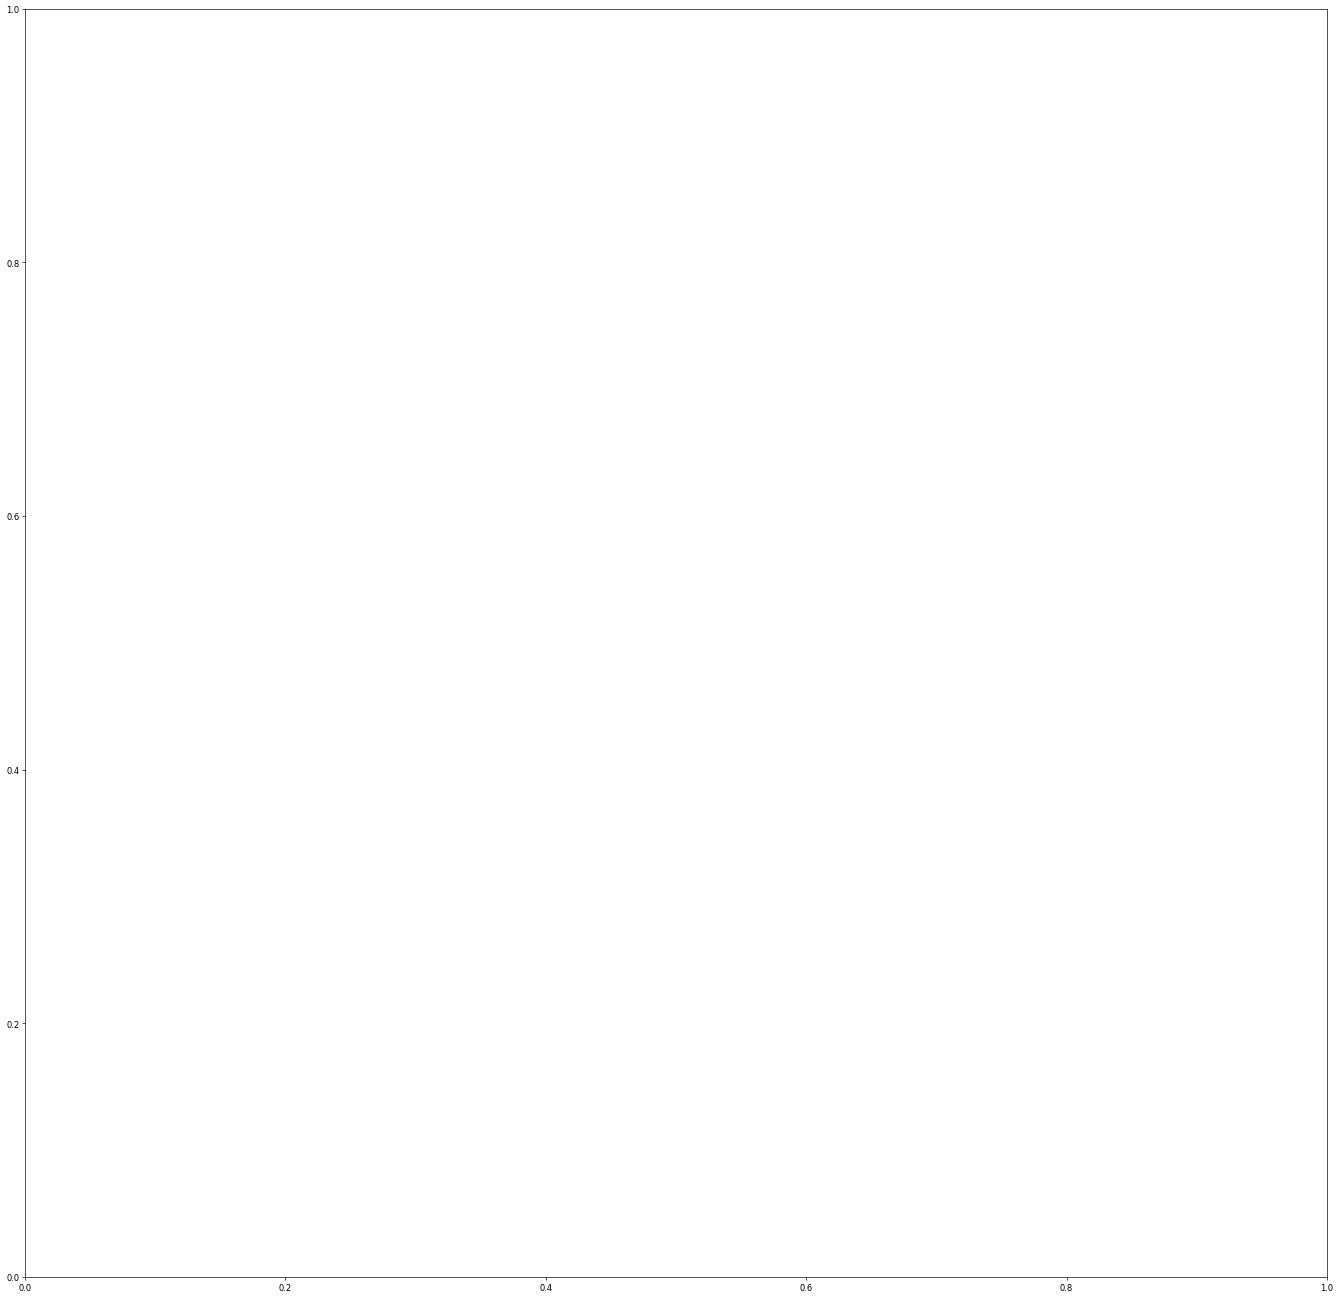

In [7]:
paths = get_paths()
for relative_path in paths[:1]:
   age_labels, vaccines_available, flow_scale,contact_weights,S_regions,I_regions,new_infected_regions,new_deaths_regions,vaccinated_regions,S_age_groups, I_age_groups,new_infected_age_groups,   new_deaths_age_groups,vaccinated_age_groups = utils.read_csv(relative_path=relative_path)

fig, ax = plt.subplots(figsize=(28,28), dpi=60)
paths = utils.create_named_tuple('paths', 'filepaths.txt')
config = utils.create_named_tuple('config', paths.config)


## Geographic plot of vaccines (in progress)

In [8]:
population = utils.generate_custom_population(config.age_bins, age_labels)
gdf = utils.generate_geopandas(population, paths.municipalities_geo)
gdf.plot(column='population', ax=ax, facecolor='white', edgecolor='black', alpha=0.5, linewidth=0.5, zorder=2,  legend=True, vmin=100, vmax=800000, )
plt.show()

<Figure size 432x288 with 0 Axes>

## Analysis of simulations needed

In [76]:
paths = get_paths()
results = {}
for relative_path in paths:
    results[relative_path] = utils.read_csv(relative_path=relative_path)

susceptible based
infection based
oldest first
contact based
Reading results ..
100%|██████████| 500/500 [00:09<00:00, 51.44it/s]
Reading results ..
100%|██████████| 500/500 [00:10<00:00, 47.37it/s]
Reading results ..
100%|██████████| 500/500 [00:09<00:00, 52.26it/s]
Reading results ..
100%|██████████| 500/500 [00:10<00:00, 48.91it/s]


In [77]:
objective_values = {}
for keys in results.keys():
    objective_values[keys] = np.zeros((500,3)) #element 0: deaths, element 1: infected, element 2: yll


In [78]:
for key in list(results.keys()):
    print("Finding results for ", key)
    result = results[key]
    age_labels = result[0]
    paths = utils.create_named_tuple('paths', 'filepaths.txt')
    config = utils.create_named_tuple('config', paths.config)

    new_deaths_age_groups = result[-2]
    cumulative_deaths = new_deaths_age_groups.cumsum(axis=1)
    cum_deaths = np.zeros((cumulative_deaths.shape[0], cumulative_deaths.shape[2]))
    yll = np.zeros((cumulative_deaths.shape[0]))
    for i in range(cumulative_deaths.shape[0]):
        cum_deaths[i] = cumulative_deaths[i,-1,:]
        yll[i] = utils.calculate_yll(utils.get_expected_yll(config.age_bins, age_labels),  cum_deaths[i]) 
    deaths = np.sum(cum_deaths, axis=1)
    new_infected_age_groups = result[-3]
    cumulative_infected = new_infected_age_groups.cumsum(axis=1)
    infected = np.zeros((cumulative_infected.shape[0]))
    for i in range(cumulative_infected.shape[0]):
        infected[i] = np.sum(cumulative_infected[i,-1,:])
    print(yll.shape)
    print(deaths.shape)
    print(infected.shape)
    objective_values[key][:,0] = deaths
    objective_values[key][:,1] = infected
    objective_values[key][:,2] = yll

Finding results for  results/500_simulations_susceptible_based_2021_05_30_23_19_42
(500,)
(500,)
(500,)
Finding results for  results/500_simulations_infection_based_2021_05_31_19_47_33
(500,)
(500,)
(500,)
Finding results for  results/500_simulations_oldest_first_2021_05_30_23_23_53
(500,)
(500,)
(500,)
Finding results for  results/500_simulations_contact_based_2021_05_30_23_24_11
(500,)
(500,)
(500,)


In [79]:
def density_plot(values, ax):
    # Draw the density plot
    sns.distplot(values, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = key.split('_')[2] + ' ' + key.split('_')[3], ax=ax)

Deaths



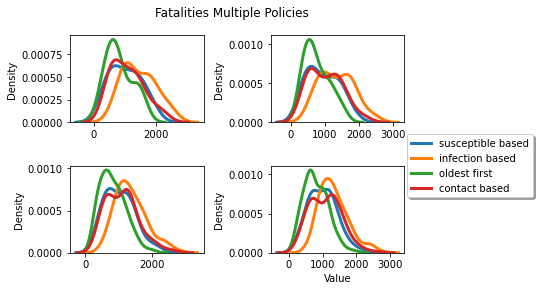

Infected



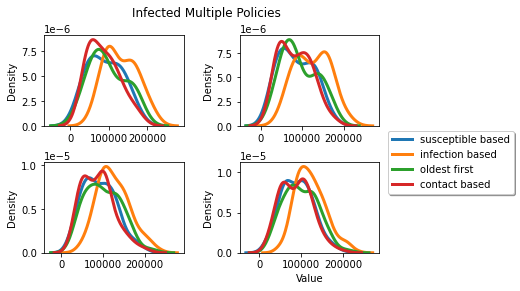

YLL



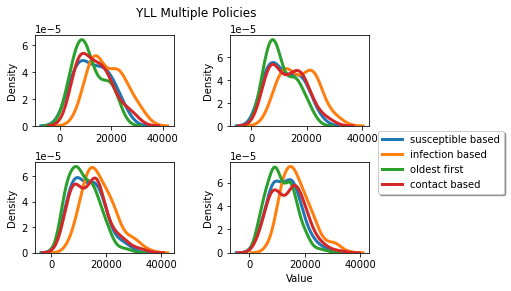

In [99]:
cut_offs = [20, 40, 100, 200]
print("Deaths")
print()
fig, axs = plt.subplots(2,2)
for i in range(len(cut_offs)):
    if i==0:
        j, k = 0,0
    elif i==1:
        j, k = 0,1
    elif i==2:
        j, k = 1,0
    elif i==3:
        j, k = 1,1
    for key in list(results.keys()): density_plot(objective_values[key][:cut_offs[i],0], axs[j,k])
plt.legend(loc='right', bbox_to_anchor=(2, 1),
        ncol=1, fancybox=True, shadow=True)
plt.suptitle('Fatalities Multiple Policies')
plt.xlabel('Value')
plt.ylabel('Density')
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()



cut_offs = [20, 40, 100, 200]
print("Infected")
print()
fig, axs = plt.subplots(2,2)
for i in range(len(cut_offs)):
    if i==0:
        j, k = 0,0
    elif i==1:
        j, k = 0,1
    elif i==2:
        j, k = 1,0
    elif i==3:
        j, k = 1,1
    for key in list(results.keys()): density_plot(objective_values[key][:cut_offs[i],1], axs[j,k])
plt.legend(loc='right', bbox_to_anchor=(2, 1),
        ncol=1, fancybox=True, shadow=True)
plt.suptitle('Infected Multiple Policies')
plt.xlabel('Value')
plt.ylabel('Density')
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()


cut_offs = [20, 40, 100, 200]
print("YLL")
print()
fig, axs = plt.subplots(2,2)
for i in range(len(cut_offs)):
    if i==0:
        j, k = 0,0
    elif i==1:
        j, k = 0,1
    elif i==2:
        j, k = 1,0
    elif i==3:
        j, k = 1,1
    for key in list(results.keys()): density_plot(objective_values[key][:cut_offs[i],2], axs[j,k])
plt.legend(loc='right', bbox_to_anchor=(2, 1),
        ncol=1, fancybox=True, shadow=True)
plt.suptitle('YLL Multiple Policies')
plt.xlabel('Value')
plt.ylabel('Density')
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()



In [112]:
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings("ignore")


## T-test of observations

In [133]:
def t_test(first, second, significance):
        """ Performs one-sided t-test to check to variables for significant difference

        Args:
            first (Individual): presumed best individual
            second (Individual): presumed worse individual
            significance (float, optional): level of significance to test against. Defaults to 0.1.

        Returns:
            bool: True if significance is achieved
        """
        significant_best = False
        if not (first==second).all():
            z = first - second
            p = scipy.stats.ttest_ind(z, np.zeros(len(first)), alternative="less").pvalue
            significant_best = p < significance
            print(p)
        return significant_best

In [135]:
key1 = list(results.keys())[3]
key2 = list(results.keys())[2]
results1 = objective_values[key1][:,0]
results2 = objective_values[key2][:,0]

significance = 0.01
cut_offs = [5,10,15,20]
for i in range(len(cut_offs)):
    print("result1_mean:", np.mean(results1[:cut_offs[i]]))
    print("result2_mean:", np.mean(results2[:cut_offs[i]]))
    print(t_test(results1[:cut_offs[i]], results2[:cut_offs[i]], significance))
    print(t_test(results2[:cut_offs[i]], results1[:cut_offs[i]], significance))

result1_mean: 1400.1861087608022
result2_mean: 1049.5639024743637
0.9962666952229757
False
0.0037333047770242976
True
result1_mean: 1086.0649026107262
result2_mean: 818.0337585580596
0.9995290295021388
False
0.00047097049786118275
True
result1_mean: 1148.1526758803418
result2_mean: 878.9492261616195
0.9999865731006058
False
1.3426899394207225e-05
True
result1_mean: 1072.3784349456366
result2_mean: 812.9400725977265
0.9999984795619996
False
1.520438000383507e-06
True
